In [2]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline

# Wczytanie zbioru cech nieruchomości i ich cen
boston_nieruchomosci = load_boston()

print('Klucze dostępne w zbiorze danych: ', boston_nieruchomosci.keys())
print('Klucze dostępne w zbiorze danych: ', boston_nieruchomosci['feature_names'])
print(boston_nieruchomosci.DESCR)


Klucze dostępne w zbiorze danych:  dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
Klucze dostępne w zbiorze danych:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built pri

In [3]:
print('Przykładowe wartości cech:\n', boston_nieruchomosci.data[:3])
print('Przykładowe kwoty: ', boston_nieruchomosci.target[:3])

Przykładowe wartości cech:
 [[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]]
Przykładowe kwoty:  [24.  21.6 34.7]


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

import seaborn as sns

# konwersja na obiekt pandas.DataFrame
boston_df = pd.DataFrame(boston_nieruchomosci['data'], columns=boston_nieruchomosci['feature_names'])

# doklejenie informacji o cenie do reszty dataframe
boston_df['target'] = np.array(list(boston_nieruchomosci['target']))
print(boston_df)

# wykres
#sns.pairplot(boston_df)
#plt.show()

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  target  
0       15.3  396.90   4.98    24.0  
1       17.8  396.90   

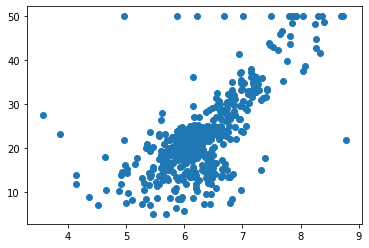

In [5]:
# Dużo zmiennych... na początek spróbujmy z jedną
l_pokoi = boston_nieruchomosci['data'][:, np.newaxis, 5]
plt.scatter(l_pokoi, boston_nieruchomosci['target'])
plt.show()

Metryka domyślna:  0.5363289497038378
Metryka r2:  0.5363289497038378
Współczynniki regresji:
 [8.7401055]


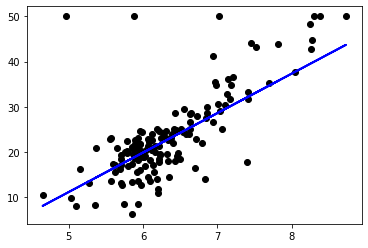

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Stworzenie regresora liniowego
linreg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(l_pokoi, boston_nieruchomosci['target'], test_size = 0.3)

linreg.fit(X_train, y_train)

# przewidywanie ceny
y_pred = linreg.predict(X_test)

# domyślna metryka
print('Metryka domyślna: ', linreg.score(X_test, y_test))

# wskaźnik (metryka) r^2
# dokumentacja: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score
print('Metryka r2: ', r2_score(y_test, y_pred))

# współczynniki regresji
print('Współczynniki regresji:\n', linreg.coef_)

# Wykres regresji
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=2)
plt.show()

In [7]:
# dokumentacja: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
from sklearn.model_selection import cross_val_score

cv_score_r2 = cross_val_score(linreg, l_pokoi, boston_nieruchomosci.target, cv=5, scoring='r2')
print(cv_score_r2)

# używamy innej metryki 
# dokumentacja:
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
cv_score_ev = cross_val_score(linreg, l_pokoi, boston_nieruchomosci.target, cv=5, scoring='explained_variance')
print(cv_score_ev)

# ...i jeszcze innej
cv_score_mse = cross_val_score(linreg, l_pokoi, boston_nieruchomosci.target, cv=5, scoring='neg_mean_squared_error')
print(cv_score_mse)

[ 0.70708692  0.63476138  0.50385441 -0.21594318 -1.77736913]
[ 0.70944924  0.69763179  0.7704844  -0.2159426  -0.50013497]
[ -10.11581024  -33.25013827  -39.73491255 -106.6526283   -73.84557039]


In [8]:
# Zadanie 1
# Wybierz inną cechę i spróbuj przewidzieć ceny mieszkań. Użyj walidacji krzyżowej.

#wybrana cecha: (7) DIS weighted distances to five Boston employment centres
distance = boston_nieruchomosci['data'][:, np.newaxis,7]
#plt.scatter(distance, boston_nieruchomosci['target'])
#plt.show()
#tworzymy nowy regresor
linreg = LinearRegression()
#dzielimy na zbiory testowe i uczące
X_train, X_test, y_train, y_test = train_test_split(distance, boston_nieruchomosci['target'], test_size = 0.3)
#uczymy regrosor na danych uczących
linreg.fit(X_train, y_train)

# przewidywanie ceny
y_pred = linreg.predict(X_test)
print('Metryka domyślna: ', linreg.score(X_test, y_test))

cv_score_r2 = cross_val_score(linreg, distance, boston_nieruchomosci.target, cv=5, scoring='r2')
print('R2',cv_score_r2)
cv_score_ev = cross_val_score(linreg, distance, boston_nieruchomosci.target, cv=5, scoring='explained_variance')
print('explained_variance',cv_score_ev)
cv_score_mse = cross_val_score(linreg, distance, boston_nieruchomosci.target, cv=5, scoring='neg_mean_squared_error')
print('neg_mean_squared_error',cv_score_mse)


# Zadanie bonus: zaimportuj dane nt cukrzycy przy pomocy funkcji load_diabetes
# Następnie przeanalizuj dane i zaproponuj regresor liniowy. Sprawdź jakość modelu za pomocą walidacji krzyżowej.

Metryka domyślna:  0.06501081632446792
R2 [-1.79151691e-01  5.72171651e-04 -9.19171854e-01 -1.09544022e-01
 -1.77762058e+00]
explained_variance [-0.01897404  0.14020778 -0.26365505 -0.00249512  0.05865143]
neg_mean_squared_error [ -40.72223372  -90.98466461 -153.70110631  -97.32016083  -73.85225599]
